<a href="https://colab.research.google.com/github/Debasmita19/Project/blob/main/Copy_of_gen1_(mem_not_considered).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import time
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import queue


In [ ]:
'''
vertex generator generates each individual with their properties
'''

def gen_vertex(no_nodes):
    ver_list=[]
    c=0

    for i in range(no_nodes):
      vertex = c
      ver_list.append(vertex)
      c+=1
    return ver_list

In [ ]:
'''
Generating the Small World Network
'''

def gen_graph(no_nodes): #k=no of connected components
   individuals = gen_vertex(no_nodes)
   d=3 #each node connected to how many nodes
   G=nx.random_regular_graph(d, no_nodes, seed=None)   #connecting the  nodes with the defined parameters
   nx.draw(G)


   neighbor = []    #empty list
   for node in list(sorted(G.nodes())):
    neighbours = list(nx.all_neighbors(G, node))
    neighbor.append(neighbours)      # we have the list of neighbours among whom the nodes share messages
   print(neighbor)
   return neighbor,individuals

In [ ]:
def message_Delivery(individuals,generator,neighbors):

  new_list=[]
  check_list=[]
  level=0

  node_list=[generator]

  while True:
    print("node_list",node_list)

    for i in range(len(node_list)):
      check_list.append(node_list[i])

    if(len(node_list)!=0):
      for i in range(len(node_list)):
        node=node_list[i]
        print("node",node)
        neighbours= neighbors[node]
        print("neighbours",neighbours)

        for i in range(len(neighbours)):

          if (check_list != None):
            for j in range(len(check_list)):
              if (neighbours[i] == check_list[j]):
                break

            if((neighbours[i] not in node_list) and (neighbours[i] not in new_list)):
              new_list.append(neighbours[i])

      new_list=list(set(new_list))
      node_list=new_list
      print("node_list2nd",node_list)

      level=level+1
    else:
      break





  return level




In [ ]:
def message_Delivery(individuals, generator, neighbors):

    new_list = []
    check_list = []
    level = 0

    node_list = [generator]

    while True:
        print("node_list", node_list)

        for node in node_list:
            check_list.append(node)

        if len(node_list) != 0:
            new_nodes = []
            for node in node_list:
                neighbours = neighbors[node]
                for neighbor in neighbours:
                    if neighbor not in check_list and neighbor not in new_nodes:
                        new_nodes.append(neighbor)

            new_list.extend(new_nodes)
            node_list = new_nodes
            level += 1
        else:
            break

    return level




Enter the number of time to run the code:3
[[237, 471, 342], [501, 50, 645], [812, 312, 5], [616, 353, 465], [184, 297, 658], [551, 193, 2], [237, 150, 824], [759, 453, 679], [470, 396, 411], [717, 469, 394], [720, 820, 954], [608, 562, 961], [951, 680, 739], [418, 658, 705], [81, 727, 497], [852, 651, 320], [27, 622, 727], [383, 241, 948], [337, 723, 792], [128, 168, 675], [28, 779, 23], [692, 137, 758], [714, 228, 54], [462, 323, 20], [848, 454, 268], [662, 364, 912], [287, 675, 184], [16, 531, 269], [20, 69, 899], [279, 92, 600], [521, 369, 315], [577, 125, 192], [511, 524, 682], [368, 358, 774], [437, 78, 753], [382, 296, 149], [73, 66, 131], [56, 104, 282], [982, 188, 625], [590, 217, 779], [276, 46, 975], [113, 587, 866], [446, 669, 409], [772, 889, 381], [523, 712, 845], [461, 959, 913], [40, 230, 704], [927, 430, 562], [277, 52, 826], [54, 166, 773], [1, 903, 435], [886, 803, 606], [679, 107, 48], [861, 125, 733], [49, 22, 194], [484, 916, 390], [871, 37, 239], [660, 776, 401],

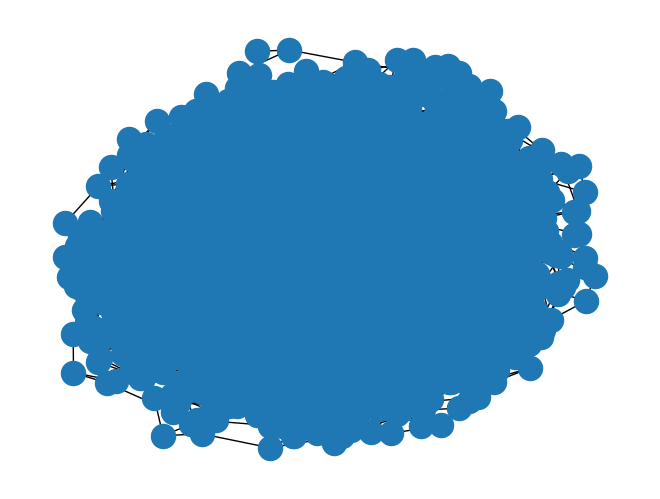

In [ ]:
number_of_run=int(input("Enter the number of time to run the code:"))
level_all_iteration=[]

for i in range(number_of_run):
  no_nodes = 1000
  neighbors, individuals = gen_graph(no_nodes)
  generator = random.choice(individuals)
  level = message_Delivery(individuals, generator, neighbors)
  print("level:",level)
  level_all_iteration.append(level)


average= np.average(level_all_iteration)
print("Average:",average)

